In [1]:
import numpy as np
import pandas as pd

In [3]:
df_features_data : pd.DataFrame = pd.read_csv('final_features.csv')

In [4]:
df_features_data.columns

Index(['Quantity', 'TotalValue', 'Price', 'AvgTransactionValue',
       'DaysSinceLastTransaction', 'UniqueProductsPurchased', 'Region_Europe',
       'Region_North America', 'Region_South America', 'FavCategory_Clothing',
       ...
       'FavProduct_P076', 'FavProduct_P078', 'FavProduct_P079',
       'FavProduct_P080', 'FavProduct_P081', 'FavProduct_P082',
       'FavProduct_P087', 'FavProduct_P094', 'FavProduct_P096',
       'FavProduct_P100'],
      dtype='object', length=111)

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [9]:
db_scores : list[float] = []
k_values : list[int] = range(2,11)

for k in k_values:
    kmeans :KMeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_features_data)
    db = davies_bouldin_score(df_features_data, kmeans.labels_)
    db_scores.append(db)

optimal_k : int = k_values[np.argmin(db_scores)]
print(db_scores)
optimal_k

[2.4367213393602216, 2.719457229082233, 2.6981673548972283, 2.478841931887928, 2.795135219656063, 2.793411784470813, 2.8010456853563364, 2.7969829885764117, 2.7566149887214144]


2

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [14]:
def graph_plot(k: int , data: np.ndarray, labels: np.ndarray):
  plt.figure(figsize=(10, 6))
  scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap="viridis", alpha=0.6)
  plt.title(f"Cluster Visualization (PCA) - k={k}")
  plt.xlabel("Principal Component 1")
  plt.ylabel("Principal Component 2")
  plt.colorbar(scatter, label="Cluster")
  plt.show()

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


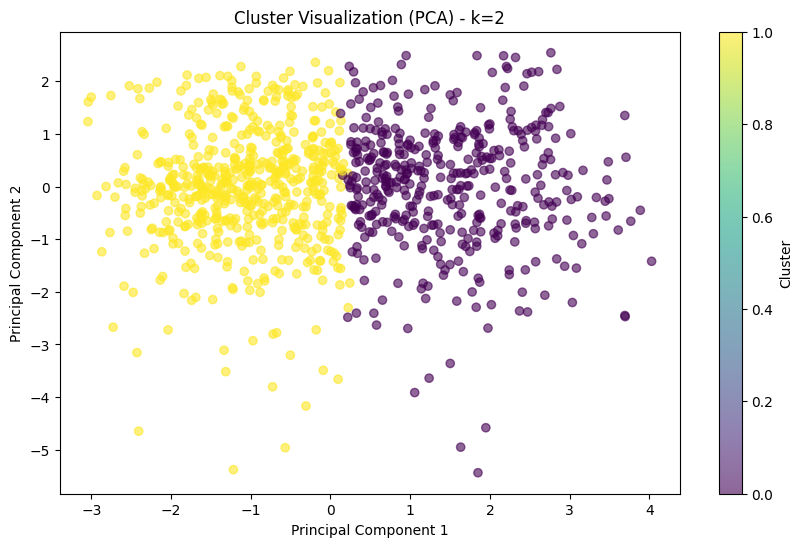

In [13]:
pca : PCA = PCA(n_components=2)
pca_data = pca.fit_transform(df_features_data)
kmeansOptimal : KMeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeansOptimal.fit(pca_data)
labels = kmeansOptimal.fit_predict(df_features_data)
graph_plot(optimal_k, pca_data, labels)

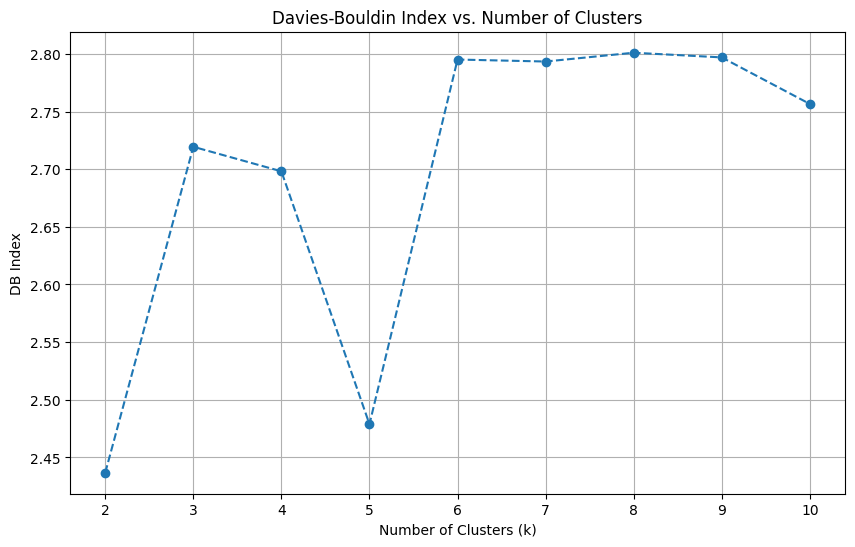

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, db_scores, marker="o", linestyle="--")
plt.title("Davies-Bouldin Index vs. Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("DB Index")
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [20]:
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.1 MB/s eta 0:00:00


In [23]:
from sklearn_extra.cluster import KMedoids  # Requires scikit-learn-extra
from sklearn.metrics import davies_bouldin_score

db_scores = []
k_values = range(2, 11)

for k in k_values:
    kmedoids = KMedoids(n_clusters=k, metric="euclidean", random_state=42)
    labels = kmedoids.fit_predict(df_features_data)
    db = davies_bouldin_score(df_features_data, labels)
    db_scores.append(db)

# Find optimal k
optimal_k = k_values[np.argmin(db_scores)]

print("Davies-Bouldin Index vs. Number of Clusters:")
for k, db in zip(k_values, db_scores):
    print(f"k={k}: DB={db}")
print(f"Optimal number of clusters: {optimal_k}")

Davies-Bouldin Index vs. Number of Clusters:
k=2: DB=5.6913735932286915
k=3: DB=5.074063007759474
k=4: DB=4.86451535500358
k=5: DB=4.979132609743462
k=6: DB=4.4065253940013225
k=7: DB=4.038410371753433
k=8: DB=3.8680151926739965
k=9: DB=3.887316331440853
k=10: DB=3.770352469238346
Optimal number of clusters: 10


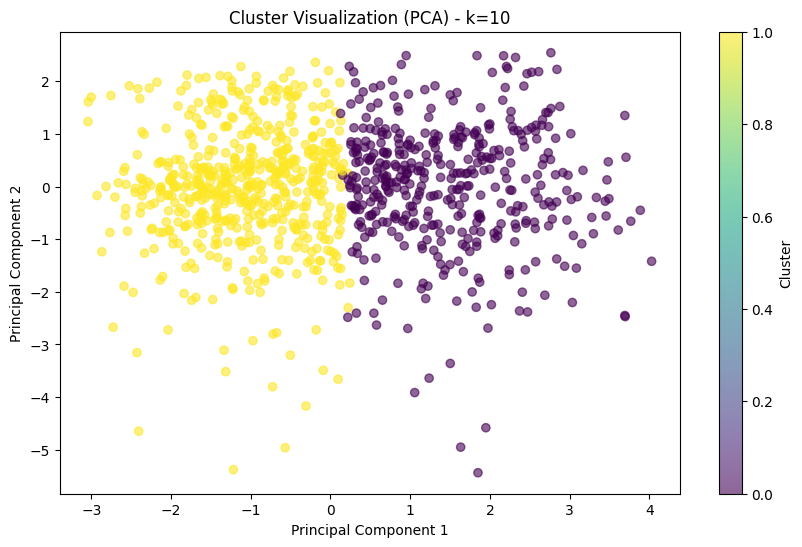

In [24]:
pca : PCA = PCA(n_components=2)
pca_data = pca.fit_transform(df_features_data)
kmedoids_optimal = KMedoids(n_clusters=optimal_k, metric="euclidean", random_state=42)
kmeansOptimal.fit(pca_data)
labels = kmeansOptimal.fit_predict(df_features_data)
graph_plot(optimal_k, pca_data, labels)

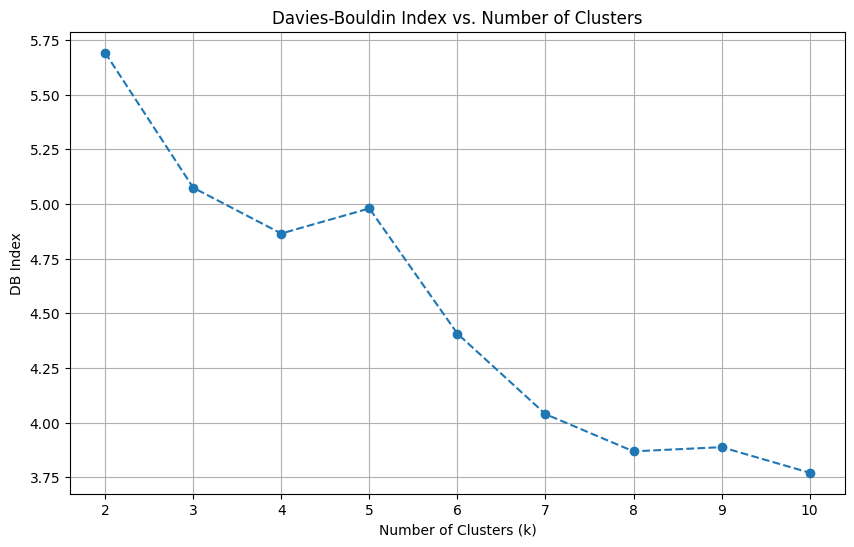

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, db_scores, marker="o", linestyle="--")
plt.title("Davies-Bouldin Index vs. Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("DB Index")
plt.xticks(k_values)
plt.grid(True)
plt.show()